# Comparison of models, plotting

In [1]:
from compare_models import r_sensibility, get_all_repeated_simu_results
from simulating import one_of_simulating

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Total losses estimated by different datasets.

In [2]:
df = get_all_repeated_simu_results(years=100, times=100, how='exp', k=0.03)

In [3]:
df.head()

,m,u,v,loss_iudm,loss_osm,u+v,used dataset
0,0.021029,0.018206,0.008682,0.065828,0.079697,0.026887,all
1,0.019708,0.017321,0.008277,0.059362,0.070689,0.025598,all
2,0.019822,0.017444,0.008348,0.057160,0.067648,0.025793,all
3,0.020788,0.018161,0.008671,0.063694,0.076834,0.026832,all
4,0.020334,0.017673,0.008417,0.066087,0.080999,0.026091,all


In [31]:
piv = df.pivot_table(index='used dataset', values='loss_iudm', aggfunc=np.mean)['loss_iudm']
a = (piv['all'] - piv['off-farm']) / piv['all']
b = (piv['farm'] - piv['all']) / piv['all']
print("an average total loss of floods in 100-times repeated simulation are {:.2%} decreased and {:.2%} increased respectively".format(a, b))

an average total loss of floods in 100-times repeated simulation are 8.27% decreased and 14.54% increased respectively


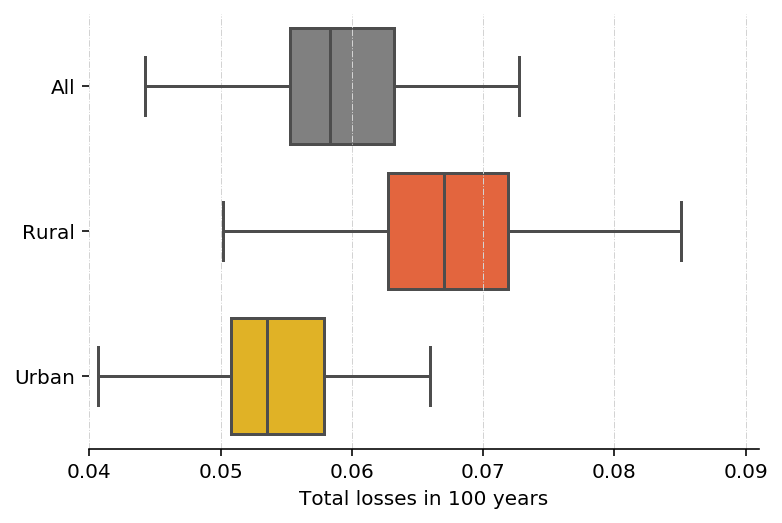

In [23]:
%config InlineBackend.figure_format ='retina'
fig, ax = plt.subplots(1, 1)
my_palette = sns.color_palette(['gray', '#FF5722', '#FFC107'])  # gray, heard of, read about
sns.boxplot(y='used dataset', x='loss_iudm', data=df, ax=ax, palette=my_palette)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(color='lightgray', linestyle='-.', linewidth=0.5)
ax.set_xlim(0.04, 0.091)
ax.set_xlabel("Total losses in 100 years")
ax.set_yticklabels(['All', 'Rural', 'Urban'])
ax.axes.yaxis.label.set_visible(False)
ax.set_ylabel("Dataset used in fitting")
plt.savefig('images/result3-1.jpg', format='jpg', dpi=300);

## One of simulating results

In [18]:
one_simu_result = one_of_simulating(years=100, k=0.03, kind='all', how='exp', random_state=1, technology=False)

osm = one_simu_result['loss_osm'].mean()
iudm = one_simu_result['loss_iudm'].mean()
percentage = (osm - iudm) / osm

print("Total losses estimated by the OSM are {:.2%} exceding by IUDM.".format(percentage));

Used params in this simulation:
p = -0.470, r = 0.487, q = 1.000
miu_s = 0.016
k_osm = 0.030, k_iudm = 0.030
Ttest_relResult(statistic=5.186224893866695, pvalue=6.149537993688617e-06)
Total losses estimated by the OSM are 16.02% exceding by IUDM.


In [ ]:
%config InlineBackend.figure_format ='retina'

t_arr = one_simu_result['y'].values
w, h, loss_osm, loss_iudm, u, v, m = [one_simu_result[col].values for col in ['w', 'h', 'loss_osm', 'loss_iudm', 'u', 'v', 'm']]

fig = plt.figure(figsize=(12, 5), tight_layout=True)

ax1 = fig.add_subplot(311)
ax1.bar(t_arr, w, color="b", label="High water level (W)")
# ax1.plot(t_arr, h, "--", color="k", label="Height of levee (H)")
ax1.set_xlim(t_arr.min(), t_arr.max())
plt.ylabel("( m )")
plt.legend(loc=1)

# ['#FFC107', '#FF5722', '#00A0E8']  # read, heard, experienced
ax2 = fig.add_subplot(323)
ax2.plot(t_arr, u+v, "-", label="Collective memory", color='gray')
ax2.plot(t_arr, u, "--", label="Communicative memory", color='#FF5722')
ax2.plot(t_arr, v, "--", label="Cultural memory", color='#FFC107')
ax2.set_xlim(t_arr.min(), t_arr.max())
ax2.legend()

ax3 = fig.add_subplot(324)
ax3.plot(t_arr, m, "-", label="Collective memory", color='gray')
ax3.set_ylim(ax2.get_ylim())
ax3.set_xlim(t_arr.min(), t_arr.max())
ax3.legend()

ax4 = fig.add_subplot(325)
markerline, stemlines, baseline = ax4.stem(t_arr, loss_osm, linefmt="-.", markerfmt="o", label="losses(F × D)",
                                           use_line_collection=True)
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax4.legend(loc=1)
ax4.set_xlim(t_arr.min(), t_arr.max())
ax4.set_xlabel("Simulated by model integrated the UDM")

ax5 = fig.add_subplot(326)
markerline, stemlines, baseline = ax5.stem(t_arr, loss_iudm, linefmt="-.", markerfmt="o",
                                           use_line_collection=True, label="$losses(F × D)$")
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax5.set_xlim(t_arr.min(), t_arr.max())
ax5.set_xlabel("Simulation by the traditional model")
ax5.set_ylim(ax4.get_ylim())
ax5.legend(loc=1)
plt.savefig('images/result3-2.jpg', format='jpg', dpi=300);

In [ ]:
%config InlineBackend.figure_format ='retina'

t_arr = one_simu_result['y'].values
w, h, loss_osm, loss_iudm, u, v, m = [one_simu_result[col].values for col in ['w', 'h', 'loss_osm', 'loss_iudm', 'u', 'v', 'm']]

fig = plt.figure(figsize=(12, 5), tight_layout=True)

ax1 = fig.add_subplot(311)
ax1.bar(t_arr, w, color="b", label="High water level (W)")
# ax1.plot(t_arr, h, "--", color="k", label="Height of levee (H)")
ax1.set_xlim(t_arr.min(), t_arr.max())
plt.ylabel("( m )")
plt.legend(loc=1)

# ['#FFC107', '#FF5722', '#00A0E8']  # read, heard, experienced
ax2 = fig.add_subplot(323)
ax2.plot(t_arr, u+v, "-", label="Collective memory", color='gray')
ax2.plot(t_arr, u, "--", label="Communicative memory", color='#FF5722')
ax2.plot(t_arr, v, "--", label="Cultural memory", color='#FFC107')
ax2.set_xlim(t_arr.min(), t_arr.max())
ax2.legend()

ax3 = fig.add_subplot(324)
ax3.plot(t_arr, m, "-", label="Collective memory", color='gray')
ax3.set_ylim(ax2.get_ylim())
ax3.set_xlim(t_arr.min(), t_arr.max())
ax3.legend()

ax4 = fig.add_subplot(325)
markerline, stemlines, baseline = ax4.stem(t_arr, loss_osm, linefmt="-.", markerfmt="o", label="losses(F × D)",
                                           use_line_collection=True)
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax4.legend(loc=1)
ax4.set_xlim(t_arr.min(), t_arr.max())
ax4.set_xlabel("Simulated by model integrated the UDM")

ax5 = fig.add_subplot(326)
markerline, stemlines, baseline = ax5.stem(t_arr, loss_iudm, linefmt="-.", markerfmt="o",
                                           use_line_collection=True, label="$losses(F × D)$")
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax5.set_xlim(t_arr.min(), t_arr.max())
ax5.set_xlabel("Simulation by the traditional model")
ax5.set_ylim(ax4.get_ylim())
ax5.legend(loc=1)
plt.savefig('images/result3-2.jpg', format='jpg', dpi=300);

In [ ]:
%config InlineBackend.figure_format ='retina'

t_arr = one_simu_result['y'].values
w, h, loss_osm, loss_iudm, u, v, m = [one_simu_result[col].values for col in ['w', 'h', 'loss_osm', 'loss_iudm', 'u', 'v', 'm']]

fig = plt.figure(figsize=(12, 5), tight_layout=True)

ax1 = fig.add_subplot(311)
ax1.bar(t_arr, w, color="b", label="High water level (W)")
# ax1.plot(t_arr, h, "--", color="k", label="Height of levee (H)")
ax1.set_xlim(t_arr.min(), t_arr.max())
plt.ylabel("( m )")
plt.legend(loc=1)

# ['#FFC107', '#FF5722', '#00A0E8']  # read, heard, experienced
ax2 = fig.add_subplot(323)
ax2.plot(t_arr, u+v, "-", label="Collective memory", color='gray')
ax2.plot(t_arr, u, "--", label="Communicative memory", color='#FF5722')
ax2.plot(t_arr, v, "--", label="Cultural memory", color='#FFC107')
ax2.set_xlim(t_arr.min(), t_arr.max())
ax2.legend()

ax3 = fig.add_subplot(324)
ax3.plot(t_arr, m, "-", label="Collective memory", color='gray')
ax3.set_ylim(ax2.get_ylim())
ax3.set_xlim(t_arr.min(), t_arr.max())
ax3.legend()

ax4 = fig.add_subplot(325)
markerline, stemlines, baseline = ax4.stem(t_arr, loss_osm, linefmt="-.", markerfmt="o", label="losses(F × D)",
                                           use_line_collection=True)
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax4.legend(loc=1)
ax4.set_xlim(t_arr.min(), t_arr.max())
ax4.set_xlabel("Simulated by model integrated the UDM")

ax5 = fig.add_subplot(326)
markerline, stemlines, baseline = ax5.stem(t_arr, loss_iudm, linefmt="-.", markerfmt="o",
                                           use_line_collection=True, label="$losses(F × D)$")
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax5.set_xlim(t_arr.min(), t_arr.max())
ax5.set_xlabel("Simulation by the traditional model")
ax5.set_ylim(ax4.get_ylim())
ax5.legend(loc=1)
plt.savefig('images/result3-2.jpg', format='jpg', dpi=300);

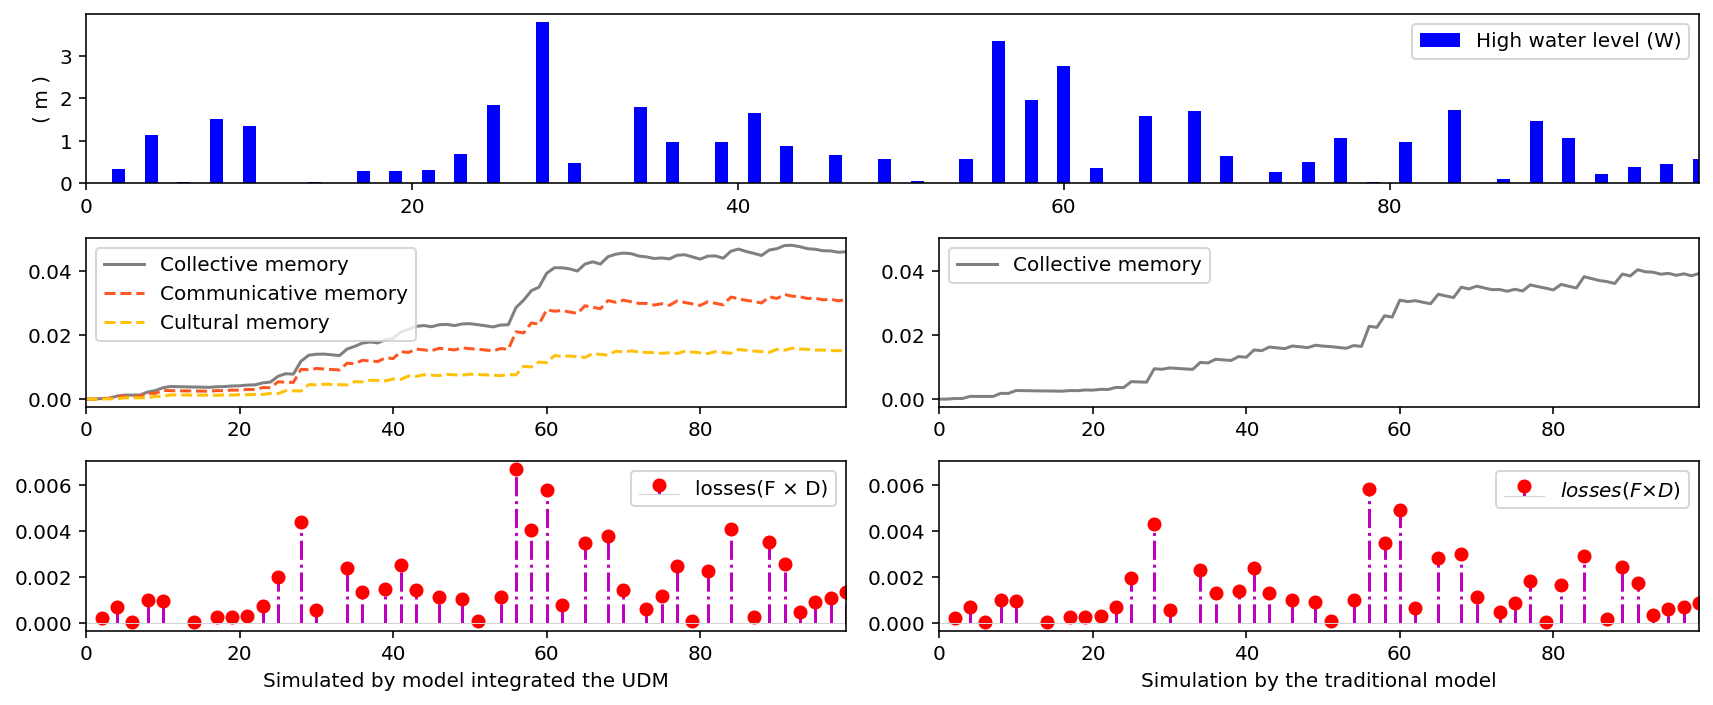

In [27]:
%config InlineBackend.figure_format ='retina'

t_arr = one_simu_result['y'].values
w, h, loss_osm, loss_iudm, u, v, m = [one_simu_result[col].values for col in ['w', 'h', 'loss_osm', 'loss_iudm', 'u', 'v', 'm']]

fig = plt.figure(figsize=(12, 5), tight_layout=True)

ax1 = fig.add_subplot(311)
ax1.bar(t_arr, w, color="b", label="High water level (W)")
# ax1.plot(t_arr, h, "--", color="k", label="Height of levee (H)")
ax1.set_xlim(t_arr.min(), t_arr.max())
plt.ylabel("( m )")
plt.legend(loc=1)

# ['#FFC107', '#FF5722', '#00A0E8']  # read, heard, experienced
ax2 = fig.add_subplot(323)
ax2.plot(t_arr, u+v, "-", label="Collective memory", color='gray')
ax2.plot(t_arr, u, "--", label="Communicative memory", color='#FF5722')
ax2.plot(t_arr, v, "--", label="Cultural memory", color='#FFC107')
ax2.set_xlim(t_arr.min(), t_arr.max())
ax2.legend()

ax3 = fig.add_subplot(324)
ax3.plot(t_arr, m, "-", label="Collective memory", color='gray')
ax3.set_ylim(ax2.get_ylim())
ax3.set_xlim(t_arr.min(), t_arr.max())
ax3.legend()

ax4 = fig.add_subplot(325)
markerline, stemlines, baseline = ax4.stem(t_arr, loss_osm, linefmt="-.", markerfmt="o", label="losses(F × D)",
                                           use_line_collection=True)
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax4.legend(loc=1)
ax4.set_xlim(t_arr.min(), t_arr.max())
ax4.set_xlabel("Simulated by model integrated the UDM")

ax5 = fig.add_subplot(326)
markerline, stemlines, baseline = ax5.stem(t_arr, loss_iudm, linefmt="-.", markerfmt="o",
                                           use_line_collection=True, label="$losses(F × D)$")
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax5.set_xlim(t_arr.min(), t_arr.max())
ax5.set_xlabel("Simulation by the traditional model")
ax5.set_ylim(ax4.get_ylim())
ax5.legend(loc=1)
plt.savefig('images/result3-2.jpg', format='jpg', dpi=300);